In [3]:
import pandas as pd
df = pd.read_csv("./editdata/scenario_merged.csv")


In [7]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# OS별로 한글 폰트 설정
def set_korean_font():
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rc('font', family='AppleGothic')
    elif system_name == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:  # 리눅스 등 기타
        # 나눔고딕 등 폰트를 다운로드해서 수동으로 지정할 수도 있음
        print("한글 폰트를 수동으로 설정하세요 (e.g., NanumGothic)")

    # 마이너스 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

# 적용
set_korean_font()

# 1. 버튼 간 소요 시간 흐름 도식화 (Flow of duration_sec between buttons)

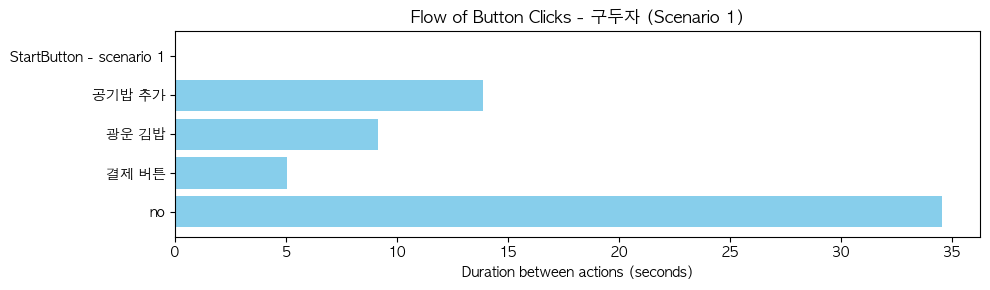

In [8]:
import matplotlib.pyplot as plt

# 한 사용자+시나리오 선택 예시
user_scenario = df[(df['username'] == '구두자') & (df['scenario'] == 'scenario 1')]

plt.figure(figsize=(10, 3))
plt.barh(user_scenario['button'], user_scenario['duration_sec'], color='skyblue')
plt.xlabel("Duration between actions (seconds)")
plt.title("Flow of Button Clicks - 구두자 (Scenario 1)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2. 시나리오별 평균 단계별 시간 + 사용자별 분포

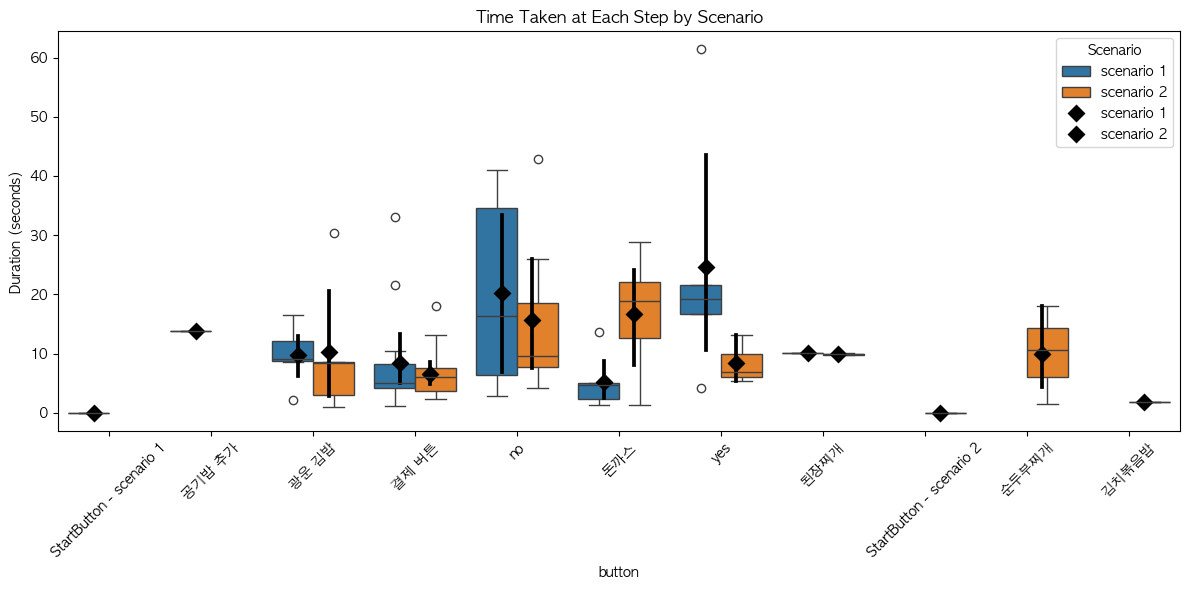

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df, x='button', y='duration_sec', hue='scenario')

# Pointplot (평균 표시)
sns.pointplot(
    data=df,
    x='button',
    y='duration_sec',
    hue='scenario',
    dodge=0.3,
    linestyle='none',
    markers='D',
    palette={'scenario 1': 'black', 'scenario 2': 'black'}  # 예시
)

plt.title("Time Taken at Each Step by Scenario")
plt.xticks(rotation=45)
plt.ylabel("Duration (seconds)")
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

# 3. yes/no 선택 전 망설이는 시간 분석

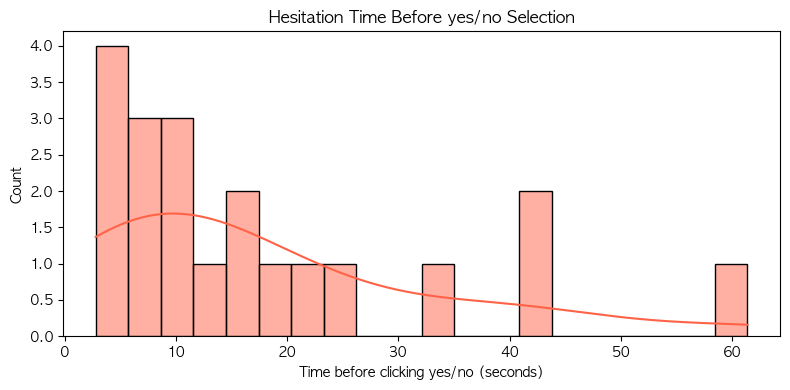

Mean hesitation time: 17.91755
Median hesitation time: 12.145


In [10]:
# yes/no 직전 duration만 필터링
yes_no_df = df[df['button'].isin(['yes', 'no'])].copy()

plt.figure(figsize=(8, 4))
sns.histplot(yes_no_df['duration_sec'], kde=True, bins=20, color='tomato')
plt.title("Hesitation Time Before yes/no Selection")
plt.xlabel("Time before clicking yes/no (seconds)")
plt.tight_layout()
plt.show()

# 평균/중앙값
print("Mean hesitation time:", yes_no_df['duration_sec'].mean())
print("Median hesitation time:", yes_no_df['duration_sec'].median())

In [ ]:
ㄴ